<font color='purple'><b><center>~ Proyecto Segundo Sprint ~</center></b></font> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Usuario/Downloads/DS_Proyecto_01_Datos_Properati.csv')

<font color='purple'><b>~ Elección de datos ~</b></font>

Los datos que se utilizarán para predecir el precio de la propiedad son la cantidad de habitaciones, baños y superficie total. El resto de datos se descartan ya que los datos elegidos dan la mayor cantidad de informacón sobre el inmueble y su posible precio.



<font color='purple'><b>~ Análisis exploratorio de datos ~</b></font>

In [3]:
data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [4]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [5]:
data.isna().sum()/data.shape[0]*100

start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

In [6]:
data.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Las variables de baños, superficie total, superficie cubierta, latitud y longitud son las únicas en presentar datos nulos. Las variables de superficie son las que presentan la mayor cantidad de datos nulos.

<font color='purple'><b>~ Correlación ~</b></font>

Text(0.5, 1.0, 'Correlación')

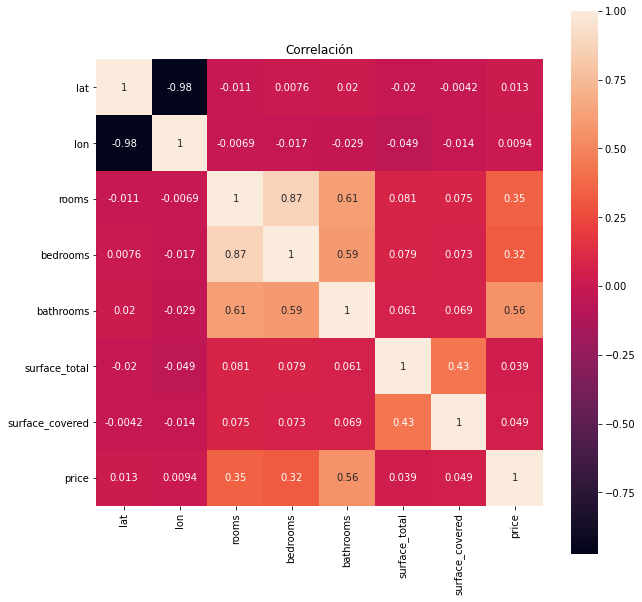

In [7]:
corr = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, square=True, annot=True).set_title('Correlación')

Aquí se puede observar que las variables que están más fuertemente correlacionadas con el precio son baños, log_sc, log_st, habitaciones y dormitorios en orden descendente.

<font color='purple'><b>~ Gráficas de distribución ~</b></font>

Text(0.5, 1.0, 'Número de Habitaciones')

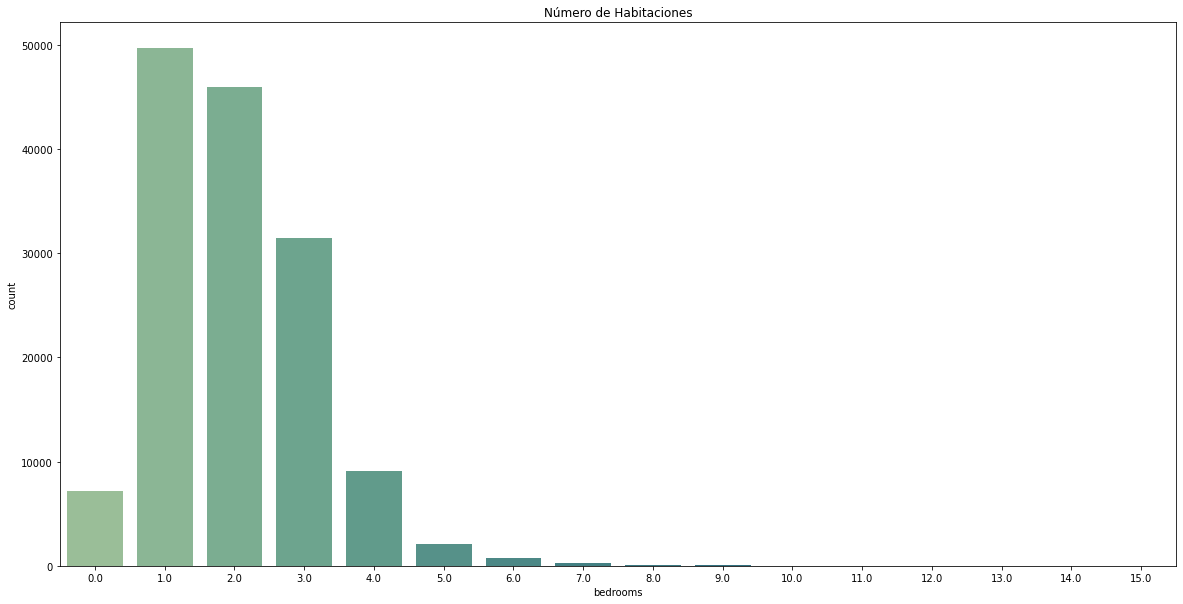

In [8]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x = "bedrooms", palette='crest').set_title('Número de Habitaciones')

Text(0.5, 1.0, 'Número de Baños')

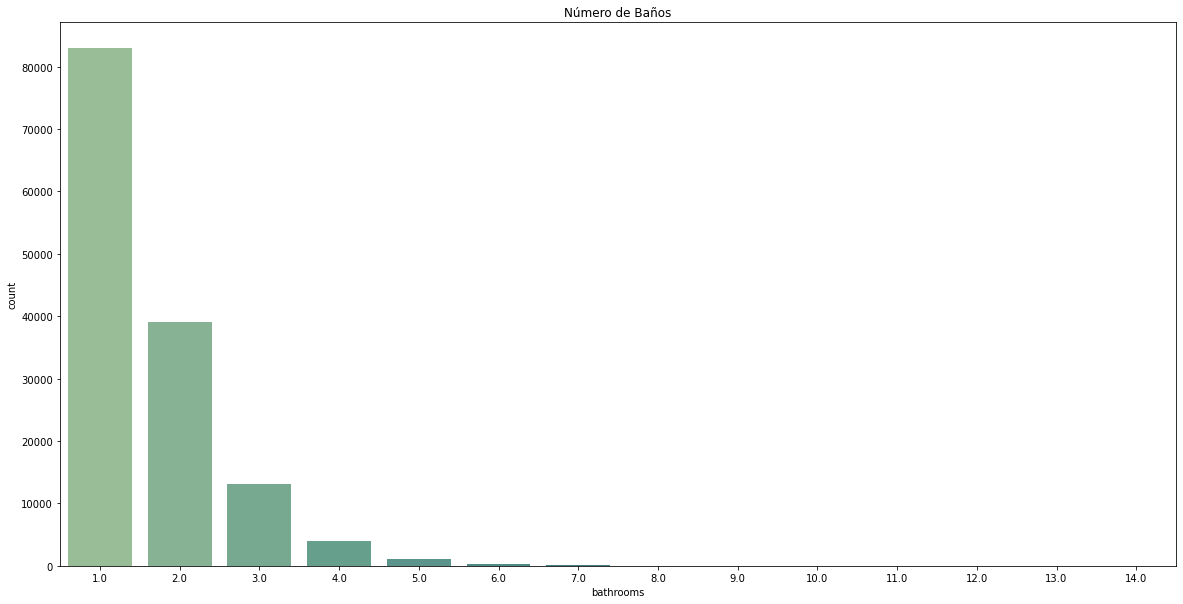

In [9]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x= "bathrooms", palette='crest').set_title('Número de Baños')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Superficie Total')

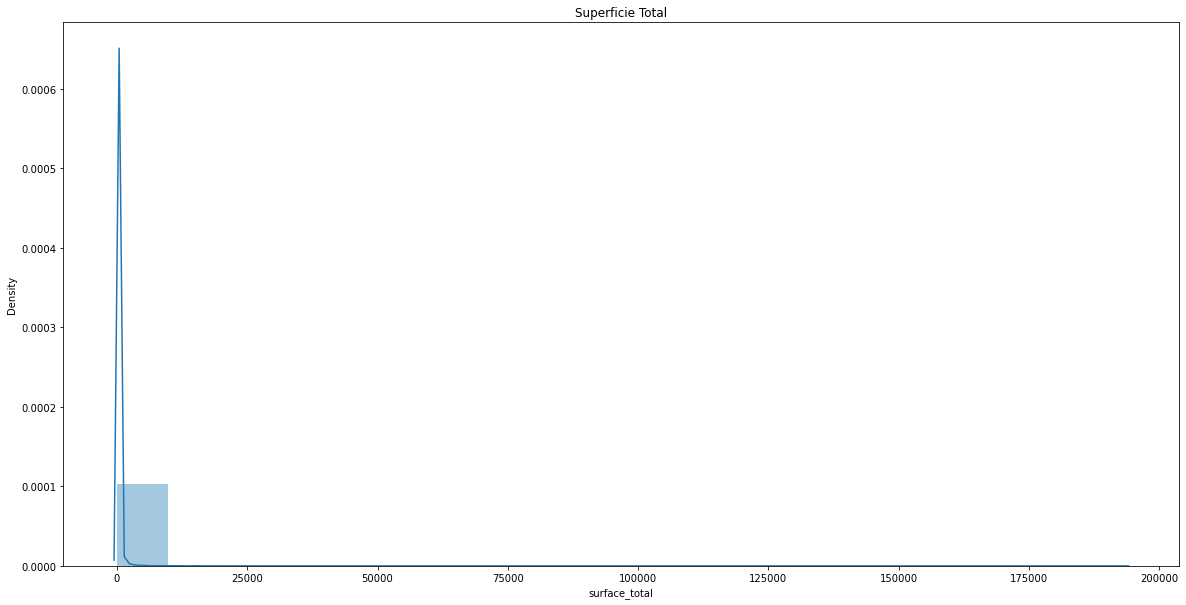

In [9]:
plt.figure(figsize = (20,10))
sns.distplot(data.surface_total, bins=20).set_title('Superficie Total')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Superficie Cubierta')

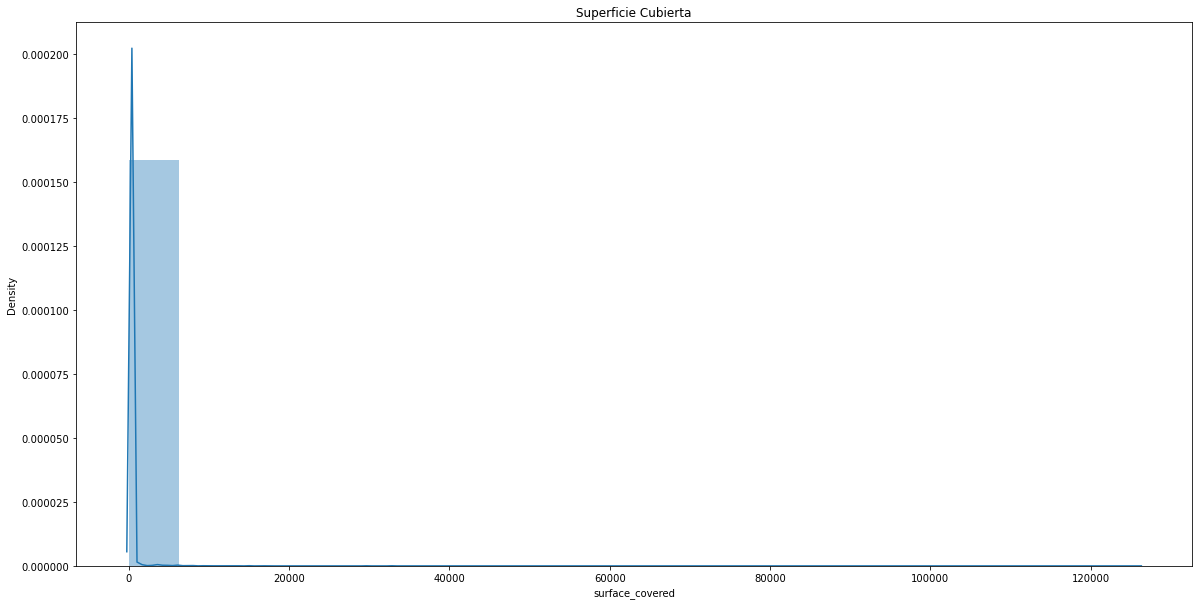

In [10]:
plt.figure(figsize = (20,10))
sns.distplot(data.surface_covered, bins=20).set_title('Superficie Cubierta')

Text(0.5, 1.0, 'Zona')

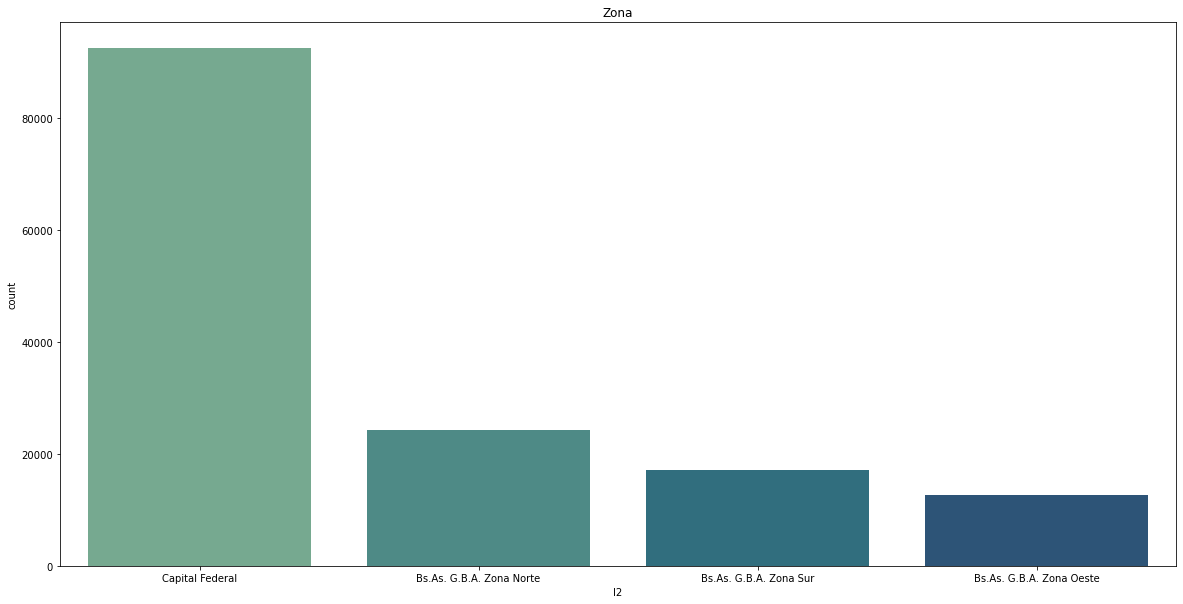

In [11]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x= "l2", order = data['l2'].value_counts().index, palette= 'crest').set_title('Zona')

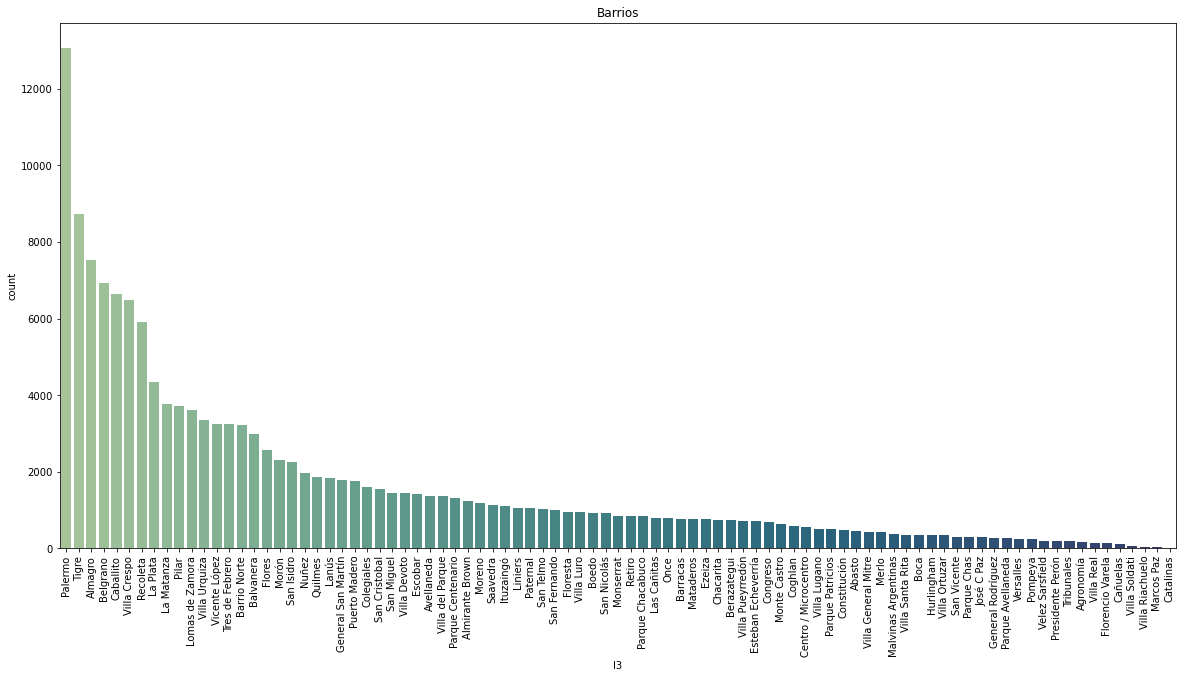

In [12]:
plt.figure(figsize = (20,10))
sns.countplot(data=data, x= "l3", order = data['l3'].value_counts().index, palette= 'crest').set_title('Barrios')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)

<font color='purple'><b>~ Presencia de datos atípicos ~</b></font>

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot ST')

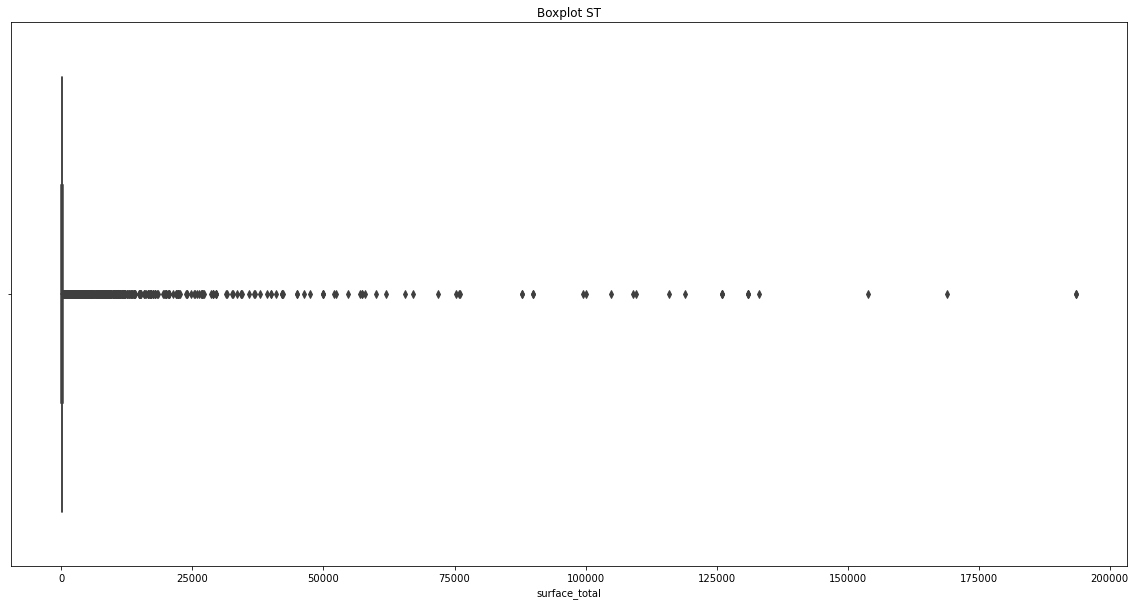

In [13]:
plt.figure(figsize = (20,10))
sns.boxplot(data.surface_total).set_title('Boxplot ST')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot SC')

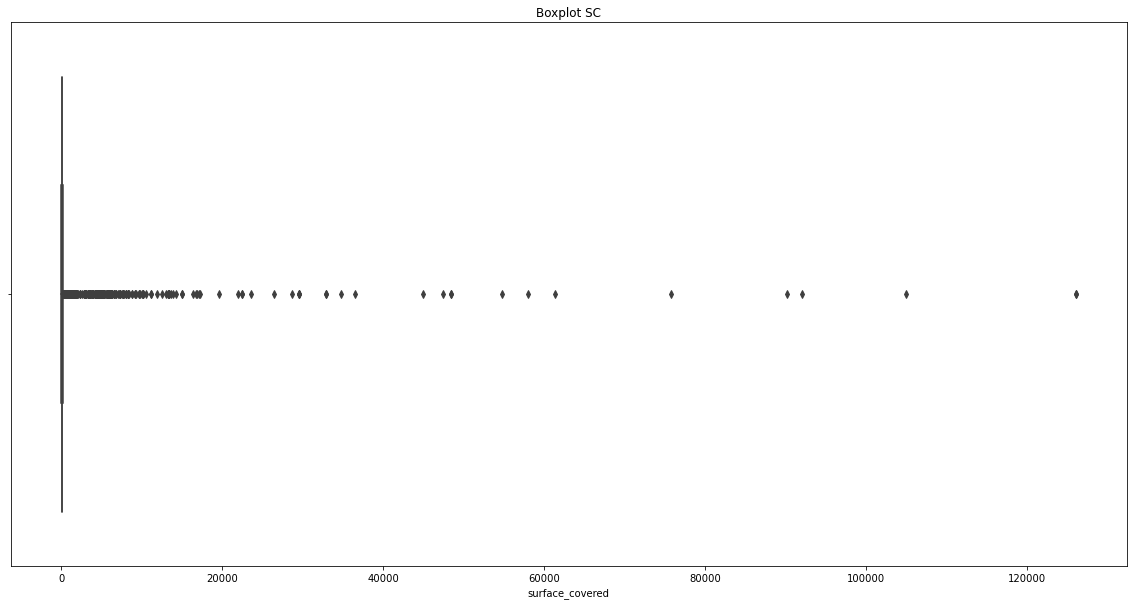

In [15]:
plt.figure(figsize = (20,10))
sns.boxplot(data.surface_covered).set_title('Boxplot SC')

Se puede observar la presencia de outliers en las variables `surface_total` y `surface_covered` además de una alta dispersión de los datos.

<font color='purple'><center><b>~ Pre-procesamiento de datos ~</b></center></font>

Para realizar los modelos de regresión se realizará un filtrado de datos de tal forma que se evaluen las propiedades con valores menores a los 4000000 dolares, las propiedades de tipo PH, departamento y casa y aquellas cuya superficie este entre los 15 y 1000 m2. También se hará imputación de los valores nulos de la variable `bathrooms` utilizando su media.

In [14]:
df2 = data[(data['price'] <= 4000000)] #filtando propiedades con precios menores a 4000000 dolares
df2 = df2[(df2['l2'] == "Capital Federal") & (df2.property_type.isin(['Departamento','Casa','PH']))] #filtrando por zona y tipo de propiedades, las más publicadas
df2 = df2[(df2['surface_total']>= 15) & (df2['surface_total'] <= 1000)] #filtrando propiedades con superficies entre 15 y 1000 m2

In [15]:
df2

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


In [16]:
df2['bathrooms'].fillna(df2['bathrooms'].mean(), inplace = True)

In [17]:
df2.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                4263
lon                4263
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered     517
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [18]:
df2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,78110.000000,78110.000000,82373.000000,82373.000000,82373.000000,82373.000000,81856.000000,8.237300e+04
mean,-34.598459,-58.435010,3.006810,2.000413,1.553495,95.239714,84.835736,2.628461e+05
std,0.023533,0.035893,1.308269,1.051184,0.848043,77.258098,155.464754,2.976546e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,-34.612337,-58.457843,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,-34.598771,-58.432867,3.000000,2.000000,1.000000,71.000000,63.000000,1.799000e+05
75%,-34.584180,-58.409600,4.000000,3.000000,2.000000,110.000000,96.000000,2.800000e+05
max,-34.535909,-58.353930,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


<font color='purple'><b>Modelo Benchmark</b></font>

In [19]:
X = df2[['surface_total', 'bedrooms', 'bathrooms']]
y= df2.price

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(57661, 3) (57661,) (24712, 3) (24712,)


In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=12, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, random_state=42)

In [22]:
#Arbol de decisión
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 132106.83584126626
Raíz del error cuadrático medio en Test: 167704.72652522515


<font color='purple'><b>PCA</b></font>

In [23]:
encode_b = pd.get_dummies(df2.l3)
df_destino = pd.concat([df2, encode_b], axis=1)

In [24]:
df_destino

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X = df_destino[['surface_total', 'bedrooms', 'bathrooms']]
y= df_destino.price

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_nuevo = pca.fit_transform(X) 

In [27]:
pca.components_

array([[ 0.99992997,  0.00945576,  0.00711632],
       [-0.01174834,  0.86552969,  0.50071982],
       [-0.0014247 , -0.50076836,  0.86558016]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [29]:
regresor2 = DecisionTreeRegressor(max_depth=10)
regresor2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [30]:
y_train_pred = regresor2.predict(X_train)
y_test_pred = regresor2.predict(X_test)

In [31]:
#PCA
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

18103640685.36668
30554500553.557888


In [32]:
regresor2.feature_importances_

array([0.70770586, 0.04839657, 0.24389758])

Para evaluar los resultados del modelo se hace uso de RMSE para elegir el modelo que presente los errores más bajos entre los modelos utlizados. Ya que los errores están afectados por el efecto de los valores atípicos de superficie, esto no busca mostrar los errores minimos posibles que harían a este modelo más eficiente.

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 304815.9395265524
Raíz del error cuadrático medio en Test: 306163.89900068316


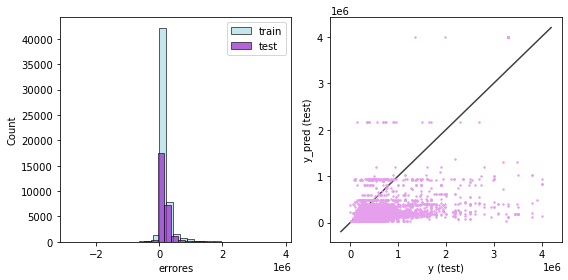

Modelo: PCA
Raíz del error cuadrático medio en Train: 134549.77029102162
Raíz del error cuadrático medio en Test: 174798.45695416734


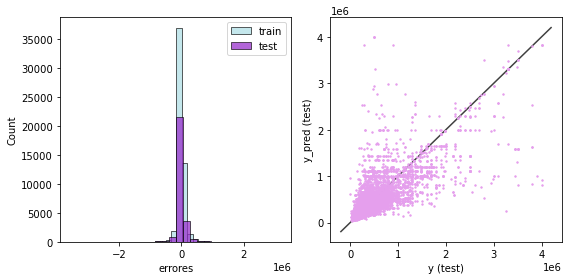

In [33]:
from sklearn.metrics import mean_squared_error
modelos = ['Árbol de Decisión', 'PCA']

for i, model in enumerate([tree_regressor, regresor2]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')
      
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')    
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.histplot(np.array(y_train) - y_train_pred, bins = 30, label = 'train', color='powderblue')
    sns.histplot(np.array(y_test) - y_test_pred, bins = 30, label = 'test', color = 'darkorchid')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2, c='#e59fed')    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

<font color='purple'><b>Conclusión</b></font>

De acuerdo a los resultados obtenidos, el modelo elegido entre los dos es PCA al presentar errores menores a los de árbol de decisión. 

<font color='purple'><b>Problemas a solucionar</b></font>

Ambos modelos muestran errores menores en `train` que en `test` lo que podría significar cierto sobreajuste aunque en ninguno de los dos la diferencia es muy grande o significativa.